**<font size=48>Machine Learning</font>**<br>

LAB 01- Using keras with MNIST dataset

Modified National Institute of Standards and Technology database(MNIST) is a large dataset which is normally used in Computer vision tasks such as image processing as it consists of various handwritten digits.

In this lab we shall use this dataset with keras in order to build and train Convolutional Neural Networks(CNNS)

In [1]:
# This is needed if you need to read data from your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORT LIBRARIES

In [2]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

**LOADING THE MNIST DATASET**

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**CHECK THE SIZE AND DIMENSIONS OF THE MNIST DATASET**

In [4]:
#Dimension of X_train[0]
print("Dimension of X_train[0]:", X_train[0].shape)

# Print the size of y_train and y_test
print("Size of y_train:", len(y_train))
print("Size of y_test:", len(y_test))


Dimension of X_train[0]: (28, 28)
Size of y_train: 60000
Size of y_test: 10000


**PREVIEW OF THE DATASET**

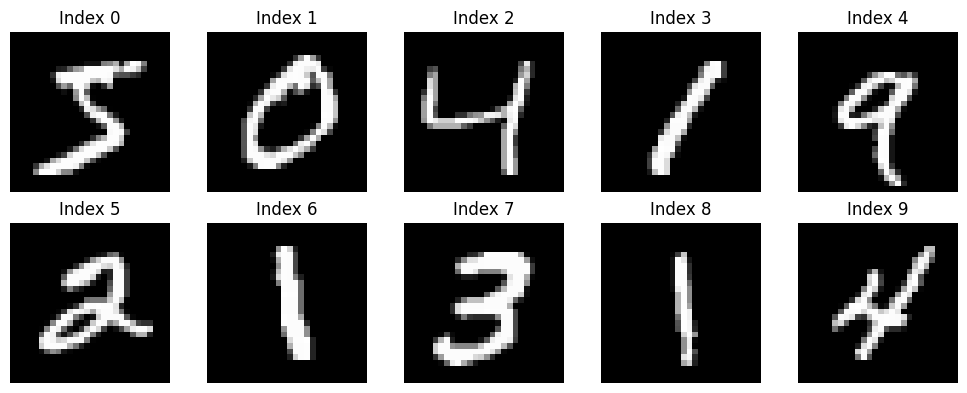

In [5]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

# Flatten the axes array for easier indexing
axes = axes.flatten()
#loop
for i in range(10):
    axes[i].imshow(X_train[i], cmap="gray")
    axes[i].set_title("Index " + str(i))
    axes[i].axis("off")

plt.tight_layout()
plt.show()


**PREPROCESSING OF THE MNIST DATASET**

In [6]:
# Get image dimensions
image_height, image_width = X_train[0].shape
num_of_training_images = len(y_train)
num_of_testing_images = len(y_test)
print("Image Dimensions:")
print(f"  Height: {image_height}")
print(f"  Width: {image_width}")

print("\nNumber of Images:")
print(f"  Training: {num_of_training_images}")
print(f"  Testing: {num_of_testing_images}")


Image Dimensions:
  Height: 28
  Width: 28

Number of Images:
  Training: 60000
  Testing: 10000


In [7]:
# Reshape the training and testing data to flatten the images
# Flattening is necessary for many machine learning algorithms that expect 1D input
# The new shape is (number of images, image_height * image_width)
X_train = X_train.reshape(num_of_training_images, image_height * image_width)
X_test = X_test.reshape(num_of_testing_images, image_height * image_width)

# Print the shapes of the reshaped data
# This helps to confirm that the reshaping was successful
print("Shapes after reshaping:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test:  {X_test.shape}")


Shapes after reshaping:
  X_train: (60000, 784)
  X_test:  (10000, 784)


In [8]:
print(X_train[8].shape)

(784,)


In [9]:
print(X_train[8])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   5  63 197   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  20 254 230  24   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  20 254 254  48   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  20 254 255  48   0   0   0   0   0   0   

**NORMALIZE THE MNIST DATASET**

In [10]:
# Convert the data type of training and testing data to float32
# This is typically done to ensure compatibility with certain machine learning algorithms
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

# Scale the pixel values to a range between 0 and 1
# This is commonly done to ensure numerical stability and faster convergence during training
X_train /= 255.0
X_test /= 255.0

# Print the shape and content of the first training sample after scaling
# This helps to confirm that the scaling was successful
print("Shape of the first training sample after scaling:", X_train[0].shape)
print("Content of the first training sample after scaling:")
print(X_train[0])


Shape of the first training sample after scaling: (784,)
Content of the first training sample after scaling:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.   

In [11]:
print(y_train.shape)
print(y_test.shape)

# Print the first 3 training and test labels
print(y_train[0], y_train[1], y_train[2])
print(y_test[0],  y_test[1],  y_test[2] )

(60000,)
(10000,)
5 0 4
7 2 1


In [12]:
# Convert training and test labels into categorical vectors
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test , 10)

print(y_train.shape)
print(y_test.shape)

# Print the first 3 training and test labels
print(y_train[0], y_train[1], y_train[2])
print(y_test[0],  y_test[1],  y_test[2] )

(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [13]:
print("input_shape =", X_train[0].shape)

layer_1_input_shape    = X_train[0].shape
layer_1_num_of_outputs = 512
layer_2_num_of_outputs = 512
layer_3_num_of_outputs = 10

input_shape = (784,)


In [14]:
model = Sequential()

layer_1 = Dense( layer_1_num_of_outputs, activation="relu", input_shape=layer_1_input_shape )
layer_2 = Dense( layer_2_num_of_outputs, activation="relu")
layer_3 = Dense( layer_3_num_of_outputs, activation="softmax")

model.add(layer_1)
model.add(layer_2)
model.add(layer_3)

In [15]:
model.compile( optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
def print_layer_info(layer_no, num_inputs, num_outputs):
   print("Layer Number =>", layer_no)
   print("Number of inputs  =", num_inputs)
   print("Number of outputs =", num_outputs)
   print("Number of parameters =", (num_inputs + 1) * num_outputs)  # + 1 are the biases

print_layer_info( 1, layer_1_input_shape[0], layer_1_num_of_outputs )
print()
print_layer_info( 2, layer_1_num_of_outputs, layer_2_num_of_outputs )
print()
print_layer_info( 3, layer_2_num_of_outputs, layer_3_num_of_outputs )

Layer Number => 1
Number of inputs  = 784
Number of outputs = 512
Number of parameters = 401920

Layer Number => 2
Number of inputs  = 512
Number of outputs = 512
Number of parameters = 262656

Layer Number => 3
Number of inputs  = 512
Number of outputs = 10
Number of parameters = 5130


In [18]:
def train(num_of_epochs, batch_size):
  print("Number of epochs =", num_of_epochs)
  print("Batch size =", batch_size)
  print("Number of batches =", num_of_training_images / batch_size)

  history = model.fit(
                      X_train, y_train,
                      epochs = num_of_epochs,
                      batch_size = batch_size,
                      validation_data = (X_test, y_test)
                     ).history
  return history

In [ ]:
num_of_epochs = 5

history0 = train(num_of_epochs = num_of_epochs, batch_size = 16)

print(history0)

Number of epochs = 5
Batch size = 16
Number of batches = 3750.0
Epoch 1/5
3750/3750 [==============================] - 39s 10ms/step - loss: 0.1861 - accuracy: 0.9428 - val_loss: 0.1120 - val_accuracy: 0.9643
Epoch 2/5
3750/3750 [==============================] - 39s 10ms/step - loss: 0.0858 - accuracy: 0.9738 - val_loss: 0.1042 - val_accuracy: 0.9708
Epoch 3/5
3750/3750 [==============================] - 38s 10ms/step - loss: 0.0621 - accuracy: 0.9809 - val_loss: 0.0820 - val_accuracy: 0.9753
Epoch 4/5
3750/3750 [==============================] - 38s 10ms/step - loss: 0.0506 - accuracy: 0.9842 - val_loss: 0.0779 - val_accuracy: 0.9789
Epoch 5/5
3750/3750 [==============================] - 38s 10ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.0970 - val_accuracy: 0.9755
{'loss': [0.18606655299663544, 0.0858127772808075, 0.06205184757709503, 0.050620123744010925, 0.04058436304330826], 'accuracy': [0.9428333044052124, 0.973800003528595, 0.9809166789054871, 0.9842000007629395, 0.9

In [19]:
from keras import regularizers

model = Sequential()

# Define regularizer
regularizer = regularizers.l2(0.01)  # Adjust the regularization strength as needed

layer_1 = Dense(layer_1_num_of_outputs, activation="relu", kernel_regularizer=regularizer, input_shape=layer_1_input_shape)
layer_2 = Dense(layer_2_num_of_outputs, activation="relu", kernel_regularizer=regularizer)
layer_3 = Dense(layer_3_num_of_outputs, activation="softmax", kernel_regularizer=regularizer)

model.add(layer_1)
model.add(layer_2)
model.add(layer_3)


In [20]:
model.compile( optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"] )

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
def print_layer_info(layer_no, num_inputs, num_outputs):
   print("Layer Number =>", layer_no)
   print("Number of inputs  =", num_inputs)
   print("Number of outputs =", num_outputs)
   print("Number of parameters =", (num_inputs + 1) * num_outputs)  # + 1 are the biases

print_layer_info( 1, layer_1_input_shape[0], layer_1_num_of_outputs )
print()
print_layer_info( 2, layer_1_num_of_outputs, layer_2_num_of_outputs )
print()
print_layer_info( 3, layer_2_num_of_outputs, layer_3_num_of_outputs )

Layer Number => 1
Number of inputs  = 784
Number of outputs = 512
Number of parameters = 401920

Layer Number => 2
Number of inputs  = 512
Number of outputs = 512
Number of parameters = 262656

Layer Number => 3
Number of inputs  = 512
Number of outputs = 10
Number of parameters = 5130


In [23]:
def train(num_of_epochs, batch_size):
  print("Number of epochs =", num_of_epochs)
  print("Batch size =", batch_size)
  print("Number of batches =", num_of_training_images / batch_size)

  history = model.fit(
                      X_train, y_train,
                      epochs = num_of_epochs,
                      batch_size = batch_size,
                      validation_data = (X_test, y_test)
                     ).history
  return history

In [ ]:
num_of_epochs = 5

history0 = train(num_of_epochs = num_of_epochs, batch_size = 16)

print(history0)

Number of epochs = 5
Batch size = 16
Number of batches = 3750.0
Epoch 1/5
3750/3750 [==============================] - 43s 11ms/step - loss: 1.0512 - accuracy: 0.8791 - val_loss: 0.7899 - val_accuracy: 0.9074
Epoch 2/5
3750/3750 [==============================] - 43s 11ms/step - loss: 0.8109 - accuracy: 0.8981 - val_loss: 0.7776 - val_accuracy: 0.9067
Epoch 3/5
3750/3750 [==============================] - 43s 11ms/step - loss: 0.7908 - accuracy: 0.9037 - val_loss: 0.8181 - val_accuracy: 0.8863
Epoch 4/5
3750/3750 [==============================] - 42s 11ms/step - loss: 0.7837 - accuracy: 0.9046 - val_loss: 0.7627 - val_accuracy: 0.9135
Epoch 5/5
3750/3750 [==============================] - 42s 11ms/step - loss: 0.7792 - accuracy: 0.9056 - val_loss: 0.7705 - val_accuracy: 0.9053
{'loss': [1.0511900186538696, 0.8108586668968201, 0.7907678484916687, 0.7836685180664062, 0.7791556119918823], 'accuracy': [0.8791333436965942, 0.8980833292007446, 0.9036999940872192, 0.9046499729156494, 0.90561

In [24]:
from keras import regularizers

model = Sequential()

# Define regularizer
regularizer = regularizers.l2(0.01)  # Adjust the regularization strength as needed

layer_1 = Dense(layer_1_num_of_outputs, activation="relu", kernel_regularizer=regularizer, input_shape=layer_1_input_shape)
layer_2 = Dense(layer_2_num_of_outputs, activation="relu", kernel_regularizer=regularizer)
layer_3 = Dense(layer_3_num_of_outputs, activation="relu", kernel_regularizer=regularizer)  # Additional dense layer
layer_4 = Dense(128, activation="relu", kernel_regularizer=regularizer)  # Additional dense layer
layer_5 = Dense(64, activation="relu", kernel_regularizer=regularizer)  # Additional dense layer
layer_6 = Dense(32, activation="relu", kernel_regularizer=regularizer)  # Additional dense layer
layer_7 = Dense(16, activation="relu", kernel_regularizer=regularizer)  # Additional dense layer
layer_8 = Dense(8, activation="relu", kernel_regularizer=regularizer)  # Additional dense layer
layer_9 = Dense(4, activation="relu", kernel_regularizer=regularizer)  # Additional dense layer
layer_10 = Dense(layer_3_num_of_outputs, activation="softmax", kernel_regularizer=regularizer)

model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)
model.add(layer_5)
model.add(layer_6)
model.add(layer_7)
model.add(layer_8)
model.add(layer_9)
model.add(layer_10)


In [25]:
from keras.optimizers import Adam

# Define a faster learning rate
learning_rate = 0.001  # You can adjust this value as needed

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


In [26]:
def train(num_of_epochs, batch_size):
  print("Number of epochs =", num_of_epochs)
  print("Batch size =", batch_size)
  print("Number of batches =", num_of_training_images / batch_size)

  history = model.fit(
                      X_train, y_train,
                      epochs = num_of_epochs,
                      batch_size = batch_size,
                      validation_data = (X_test, y_test)
                     ).history
  return history

In [27]:
num_of_epochs = 5

history0 = train(num_of_epochs = num_of_epochs, batch_size = 16)

print(history0)

Number of epochs = 5
Batch size = 16
Number of batches = 3750.0
Epoch 1/5
3750/3750 [==============================] - 55s 14ms/step - loss: 2.4035 - accuracy: 0.1118 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/5
3750/3750 [==============================] - 43s 12ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
Epoch 3/5
3750/3750 [==============================] - 45s 12ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/5
3750/3750 [==============================] - 44s 12ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/5
3750/3750 [==============================] - 55s 15ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3012 - val_accuracy: 0.1135
{'loss': [2.4034762382507324, 2.3013486862182617, 2.301422357559204, 2.301392078399658, 2.3013930320739746], 'accuracy': [0.11181666702032089, 0.11236666887998581, 0.11236666887998581, 0.11236666887998581, 0.112

**ENHANCEMENT**

In [29]:
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Data preparation for neural network
# Convert y_train to categorical
Y_train = to_categorical(y_train, num_classes=10)

# Normalize X_train and X_test
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape X_train and X_test
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


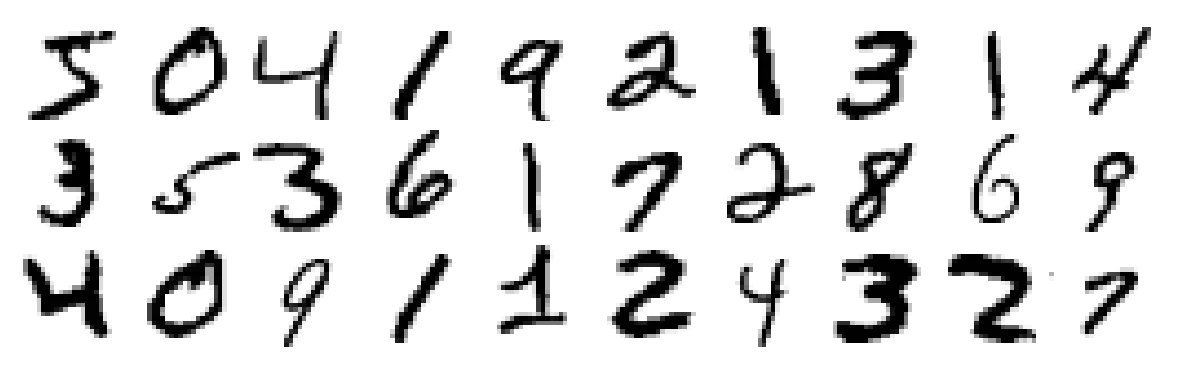

In [31]:

plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    plt.imshow(X_train[i].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [32]:
# CREATE MORE IMAGES VIA DATA AUGMENTATION
datagen = ImageDataGenerator(
        rotation_range=10,
        zoom_range = 0.10,
        width_shift_range=0.1,
        height_shift_range=0.1)

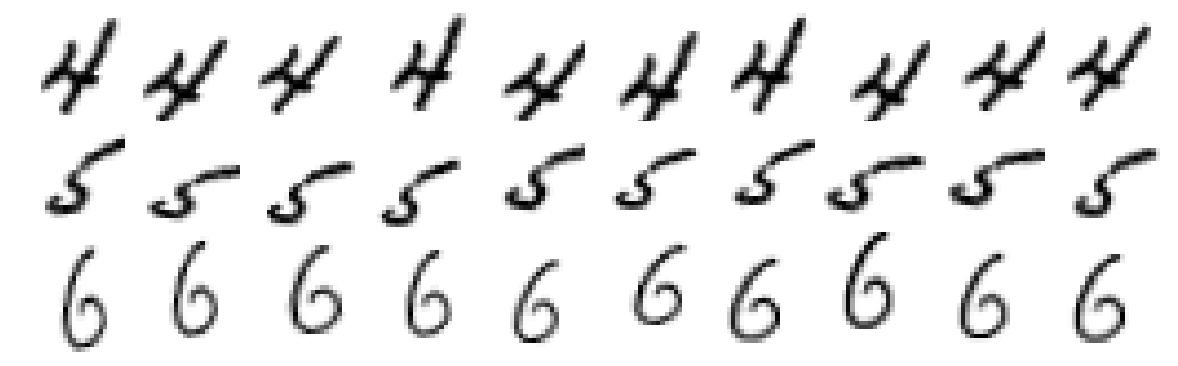

In [33]:
# PREVIEW AUGMENTED IMAGES
X_train3 = X_train[9,].reshape((1,28,28,1))
Y_train3 = Y_train[9,].reshape((1,10))
plt.figure(figsize=(15,4.5))
for i in range(30):
    plt.subplot(3, 10, i+1)
    X_train2, Y_train2 = datagen.flow(X_train3,Y_train3).next()
    plt.imshow(X_train2[0].reshape((28,28)),cmap=plt.cm.binary)
    plt.axis('off')
    if i==9: X_train3 = X_train[11,].reshape((1,28,28,1))
    if i==19: X_train3 = X_train[18,].reshape((1,28,28,1))
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define your CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [38]:
from keras.callbacks import LearningRateScheduler, EarlyStopping
from sklearn.model_selection import train_test_split

# Decrease learning rate each epoch
initial_learning_rate = 0.01
annealer = LearningRateScheduler(lambda x: initial_learning_rate * 0.95 ** x)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Set batch size and epochs
batch_size = 16
epochs = 5

# Split data into training and validation sets
X_train2, X_val2, Y_train2, Y_val2 = train_test_split(X_train, Y_train, test_size=0.1)

# Compile your model first
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    datagen.flow(X_train2, Y_train2, batch_size=batch_size),
    epochs=epochs,
    steps_per_epoch=len(X_train2) // batch_size,
    validation_data=(X_val2, Y_val2),
    callbacks=[annealer, early_stopping],
    verbose=1
)

print("Epochs={0:d}, Train accuracy={1:.5f}, Validation accuracy={2:.5f}".format(
    len(history.history['accuracy']),
    max(history.history['accuracy']),
    max(history.history['val_accuracy'])
))


Epoch 1/5
3375/3375 [==============================] - 73s 21ms/step - loss: 0.2465 - accuracy: 0.9316 - val_loss: 0.1325 - val_accuracy: 0.9620 - lr: 0.0100
Epoch 2/5
3375/3375 [==============================] - 67s 20ms/step - loss: 0.2289 - accuracy: 0.9381 - val_loss: 0.1443 - val_accuracy: 0.9650 - lr: 0.0095
Epoch 3/5
3375/3375 [==============================] - 67s 20ms/step - loss: 0.2121 - accuracy: 0.9424 - val_loss: 0.1828 - val_accuracy: 0.9582 - lr: 0.0090
Epoch 4/5
3375/3375 [==============================] - 67s 20ms/step - loss: 0.2003 - accuracy: 0.9474 - val_loss: 0.1553 - val_accuracy: 0.9643 - lr: 0.0086
Epoch 5/5
3375/3375 [==============================] - 67s 20ms/step - loss: 0.1942 - accuracy: 0.9484 - val_loss: 0.1101 - val_accuracy: 0.9722 - lr: 0.0081
Epochs=5, Train accuracy=0.94843, Validation accuracy=0.97217


In [41]:
 #Predictions on validation set
predictions = model.predict(X_val2)

# Displaying first 10 predictions
for i in range(10):
    print("Predicted:", np.argmax(predictions[i]), "Actual:", np.argmax(Y_val2[i]))

188/188 [==============================] - 3s 13ms/step
Predicted: 1 Actual: 1
Predicted: 2 Actual: 2
Predicted: 9 Actual: 9
Predicted: 1 Actual: 1
Predicted: 2 Actual: 2
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 6 Actual: 6
Predicted: 3 Actual: 3
Predicted: 3 Actual: 3


**CONVERTING THE Y-TRAIN ANDTHE Y-TEST TO CATEGORICAL FORMAT ADDING ALSO DATA AUGMENTATION TO VIEW MORE IMAGES**

In [42]:
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.10,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Apply data augmentation to the training data
# This will generate augmented images and append them to the original training dataset
augmented_data = []
for X_batch, y_batch in datagen.flow(X_train.reshape(-1, image_height, image_width, 1), y_train, batch_size=1, shuffle=False):
    augmented_data.append((X_batch.reshape(image_height, image_width), y_batch))
    if len(augmented_data) >= num_of_training_images:
        break

# Convert the augmented data back to numpy arrays
X_augmented_train = np.array([item[0] for item in augmented_data])
y_augmented_train = np.array([item[1] for item in augmented_data])

# Print the shapes of augmented training and test data
print("Augmented X_train shape:", X_augmented_train.shape)
print("Augmented y_train shape:", y_augmented_train.shape)
print("Original X_test shape:", X_test.shape)
print("Original y_test shape:", y_test.shape)

# Convert training and test labels into categorical vectors
y_augmented_train = to_categorical(y_augmented_train, 10)
y_test = to_categorical(y_test, 10)

# Print the shapes of categorical training and test labels
print("Categorical y_train shape:", y_augmented_train.shape)
print("Categorical y_test shape:", y_test.shape)


Augmented X_train shape: (60000, 28, 28)
Augmented y_train shape: (60000, 1)
Original X_test shape: (10000, 28, 28, 1)
Original y_test shape: (10000,)
Categorical y_train shape: (60000, 10)
Categorical y_test shape: (10000, 10)


**PREVIEW OF THE AUGMENTED IMAGES**

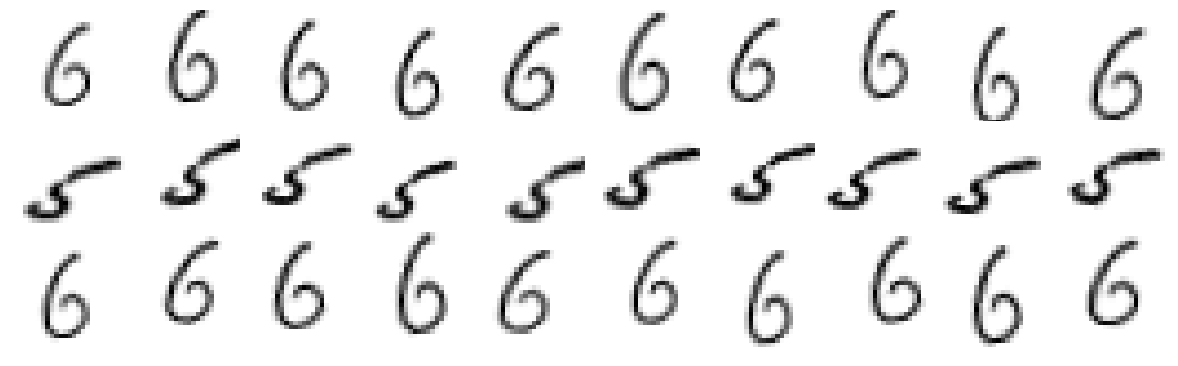

In [43]:
plt.figure(figsize=(15, 4.5))

# Loop through to generate and plot augmented images
for i in range(30):
    plt.subplot(3, 10, i + 1)
    X_train_augmented, Y_train_augmented = datagen.flow(X_train3, Y_train3).next()
    plt.imshow(X_train_augmented[0].reshape((28, 28)), cmap=plt.cm.binary)
    plt.axis('off')
    if i == 9:
        X_train3 = X_train[11].reshape((1, 28, 28, 1))  # Reshape to rank 4 tensor
    if i == 19:
        X_train3 = X_train[18].reshape((1, 28, 28, 1))  # Reshape to rank 4 tensor

# Adjust subplot spacing
plt.subplots_adjust(wspace=-0.1, hspace=-0.1)
plt.show()